In [9]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm

import xarray as xr
import fsspec

In [10]:
FOLDER = '/mnt/hgfs/ssd_tmp/'
h5_filename = os.path.join(FOLDER, 'das_example.h5')

reference_file = 'results_20210809/das_h5/das_example_ref_fs.json'

In [11]:
uri = f'file://{reference_file}'

fs = fsspec.filesystem('reference', fo=uri, remote_protocol="file")
m = fs.get_mapper("")
ds_zarr = xr.open_dataset(m, engine="zarr")
ds_zarr

/tmp/ipykernel_33567/2205709537.py:5: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds_zarr = xr.open_dataset(m, engine="zarr")


<xarray.Dataset>
Dimensions:   (phony_dim_0: 24750, phony_dim_1: 960)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    Acoustic  (phony_dim_0, phony_dim_1) float32 ...

In [12]:
ds_hdf = xr.open_dataset(h5_filename, engine='netcdf4')
ds_hdf

<xarray.Dataset>
Dimensions:   (phony_dim_0: 24750, phony_dim_1: 960)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    Acoustic  (phony_dim_0, phony_dim_1) int16 ...

In [13]:
# Per description one appears to be floats and one ints
# Could just be libs or bad options on my part

is_equal = ds_zarr == ds_hdf
is_equal_np = is_equal.to_array().to_numpy()
f'dataset_zarr == dataset_hdf {np.all(is_equal_np)}'

'dataset_zarr == dataset_hdf False'

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 24750, 960)

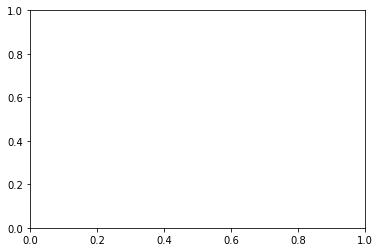

In [14]:
plt.plot(is_equal_np)



In [ ]:
is_equal.to_pandas()
